<a href="https://colab.research.google.com/github/rohitpaul09/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name   - Play Store App Review Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/rohitpaul09/Play-Store-App-Review-Analysis

# **Problem Statement**


The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps. Explore and analyze the data to discover key factors responsible for app engagement and success.

#### **Define Your Business Objective?**

Analyze the Play Store apps dataset using Python, uncovering key factors for app engagement and success, and provide valuable insights to optimize app performance in the Android market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [3]:
# mount the drive and read required data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Load Dataset
df_psdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/2_Numpy Module/chap_21_Capstone Project/Play Store Data.csv')
df_review=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/2_Numpy Module/chap_21_Capstone Project/User Reviews.csv')


### Dataset First View

In [5]:
# Dataset First Look
# Display the Play Store App data
print('Play Store Data Overview:')
df_psdata.head()


Play Store Data Overview:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Display the User Reviews data
print('User Reviews Data Overview:')
df_review.head()


User Reviews Data Overview:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print('Play Store Data Rows & Columns count:',df_psdata.shape)
print('User Reviews Data Rows & Columns count:',df_review.shape)


Play Store Data Rows & Columns count: (10841, 13)
User Reviews Data Rows & Columns count: (64295, 5)


### Dataset Information

In [8]:
# Dataset Info
print('Play Store Data Info:')
df_psdata.info()
print('\n')
print('User Reviews Data Info:')
df_review.info()
#reviews should be in int
#last updated should be in datetime

Play Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


User Reviews Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Co

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print('Play Store Data Duplicate Value Count:',len(df_psdata[df_psdata.duplicated()]))
print('User Reviews Data Duplicate Value Count:',len(df_review[df_review.duplicated()]))


Play Store Data Duplicate Value Count: 483
User Reviews Data Duplicate Value Count: 33616


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print('Play Store Data Missing Values/Null Values Count:',df_psdata.isnull().sum(),sep='\n',end='\n\n')
print('User Reviews Data Missing Values/Null Values Count:',df_review.isnull().sum(),sep='\n')


Play Store Data Missing Values/Null Values Count:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

User Reviews Data Missing Values/Null Values Count:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


Null Value Heatmap for Play Store Data


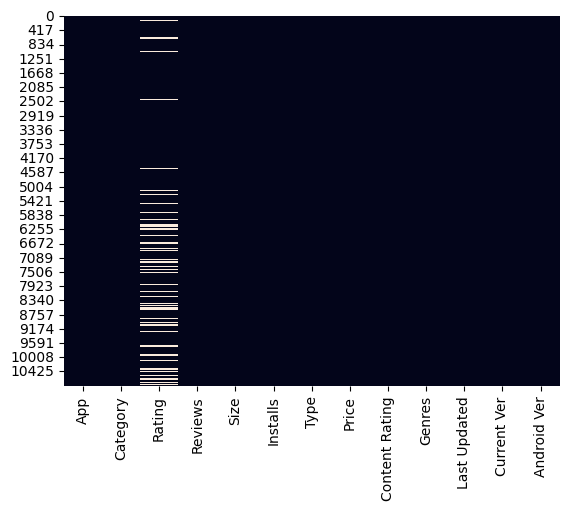

In [11]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap for Play Store Data
print('Null Value Heatmap for Play Store Data')
sns.heatmap(df_psdata.isnull(), cbar=False)
plt.show()


Null Value Heatmap for User Reviews Data


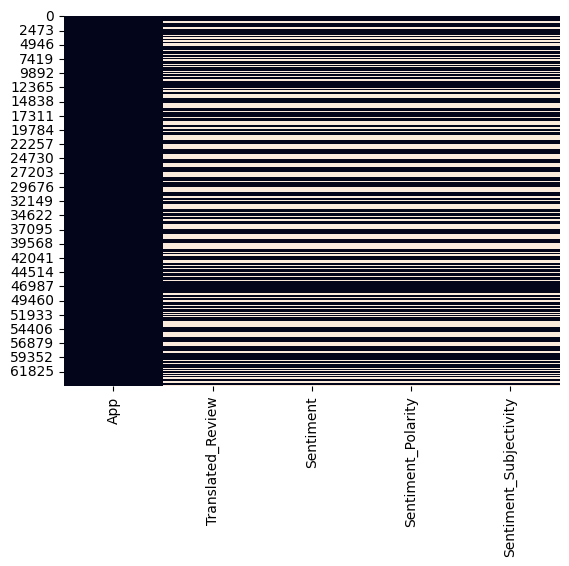

In [12]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap for User Reviews Data
print('Null Value Heatmap for User Reviews Data')
sns.heatmap(df_review.isnull(), cbar=False)
plt.show()


### What did you know about your dataset?

- The datasets are associated with the mobile application industry, focusing on the Android platform.
- Play Store dataset: 10,841 rows, 13 columns, 483 instances of duplicated rows.
  - Missing values in columns: 'Rating' (1,474), 'Type' (1), 'Content Rating' (1), 'Current Ver' (8), 'Android Ver' (3).
- User reviews dataset: 64,295 rows, 5 columns, 33,616 instances of duplicated rows.
  - Missing values in columns: 'Translated_Review' (26,868), 'Sentiment' (26,863), 'Sentiment_Polarity' (26,863), 'Sentiment_Subjectivity' (26,863).
- Primary aim: Uncover key factors contributing to app engagement and success in the Android market using this data.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
print('Play Store Dataset Columns:',df_psdata.columns,sep='\n',end='\n\n')
print('User Reviews Dataset Columns:',df_review.columns,sep='\n')


Play Store Dataset Columns:
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

User Reviews Dataset Columns:
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [17]:
# Dataset Describe

print('Play Store Dataset Description:',df_psdata.describe(include='all'),sep='\n',end='\n\n')
print('User Reviews Dataset Description:',df_review.describe(include='all'),sep='\n')


Play Store Dataset Description:
           App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

       

### Variables Description

📊**Variable Descriptions for Play Store Dataset:**

- **App:** Name of the application along with an optional short description.

- **Category:** Category to which the app belongs.

- **Rating:** Average rating given by users.

- **Reviews:** Total number of user reviews for the application.

- **Size:** Size occupied by the application on a mobile phone.

- **Installs:** Total number of installations or downloads for the application.

- **Type:** Indicates whether the app is free or paid.

- **Price:** The cost to install the app. For free apps, the price is zero.

- **Content Rating:** Indicates whether the app is suitable for all age groups.

- **Genres:** Various categories to which an application can belong.

- **Last Updated:** Date when the application was last updated.

- **Current Ver:** Current version of the application.

- **Android Ver:** Android version that supports the application on its platform.


📊**Variable Descriptions for User Reviews Dataset:**

- **App:** Name of the app with an optional short description.

- **Translated_Review:** English translation of the user's review.

- **Sentiment:** Attitude or emotion of the writer, categorized as 'Positive', 'Negative', or 'Neutral'.

- **Sentiment_Polarity:** Polarity of the review, ranging from -1 (Negative) to 1 (Positive).

- **Sentiment_Subjectivity:** Indicates how closely a reviewer's opinion aligns with the general public's opinion, with a range of [0, 1]. Higher values suggest opinions closer to the general public, while lower values indicate more factual information in the review.

### Check Unique Values for each variable.

In [25]:
# Check Unique Values for each variable.

print('Unique Values for each variable in Play Store Dataset:',end='\n\n')

for i in df_psdata.columns.tolist():
  print("No. of unique values in ",i,"is ->",df_psdata[i].nunique())

print('\n')

print('Unique Values for each variable in User Reviews Dataset:',end='\n\n')

for i in df_review.columns.tolist():
  print("No. of unique values in ",i,"is ->",df_review[i].nunique())


Unique Values for each variable in Play Store Dataset:

No. of unique values in  App is -> 9660
No. of unique values in  Category is -> 34
No. of unique values in  Rating is -> 40
No. of unique values in  Reviews is -> 6002
No. of unique values in  Size is -> 462
No. of unique values in  Installs is -> 22
No. of unique values in  Type is -> 3
No. of unique values in  Price is -> 93
No. of unique values in  Content Rating is -> 6
No. of unique values in  Genres is -> 120
No. of unique values in  Last Updated is -> 1378
No. of unique values in  Current Ver is -> 2832
No. of unique values in  Android Ver is -> 33


Unique Values for each variable in User Reviews Dataset:

No. of unique values in  App is -> 1074
No. of unique values in  Translated_Review is -> 27994
No. of unique values in  Sentiment is -> 3
No. of unique values in  Sentiment_Polarity is -> 5410
No. of unique values in  Sentiment_Subjectivity is -> 4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
# Write your code to make your dataset analysis ready.
# Remove duplicates
df_review.drop_duplicates(inplace=True)
df_psdata.drop_duplicates(inplace=True)

# Fill missing values for numerical columns with the median and categorical with the mode

# For Play Store
df_psdata['Rating'].fillna(df_psdata['Rating'].median(), inplace=True)
df_psdata['Type'].fillna(df_psdata['Type'].mode()[0], inplace=True)
df_psdata['Content Rating'].fillna(df_psdata['Content Rating'].mode()[0], inplace=True)
df_psdata['Current Ver'].fillna('Varies with device', inplace=True)
df_psdata['Android Ver'].fillna('Varies with device', inplace=True)

# For User Reviews
df_review['Sentiment_Polarity'].fillna(df_review['Sentiment_Polarity'].median(), inplace=True)
df_review['Sentiment_Subjectivity'].fillna(df_review['Sentiment_Subjectivity'].median(), inplace=True)
df_review['Sentiment'].fillna(df_review['Sentiment'].mode()[0], inplace=True)
df_review['Translated_Review'].fillna('No review', inplace=True)

# Check missing values again to confirm
user_reviews_missing_updated = df_review.isnull().sum()
play_store_missing_updated = df_psdata.isnull().sum()

print('\nUpdated number of missing values in Play Store dataset:')
print(play_store_missing_updated)
print('Updated number of missing values in User Reviews dataset:')
print(user_reviews_missing_updated)



Updated number of missing values in Play Store dataset:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
Updated number of missing values in User Reviews dataset:
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


### What all manipulations have you done and insights you found?

The following actions were taken to make the datasets analysis-ready:

1. Removed duplicates from both the Play Store and User Reviews datasets.
2. Filled missing values:
   - For the Play Store dataset:
     - 'Rating' was filled with the median.
     - 'Type' and 'Content Rating' were filled with the mode.
     - 'Current Ver' and 'Android Ver' were filled with 'Varies with device.'
   - For the User Reviews dataset:
     - 'Sentiment_Polarity' and 'Sentiment_Subjectivity' were filled with the median.
     - 'Sentiment' was filled with the mode.
     - 'Translated_Review' was filled with 'No review.'

3. Checked and confirmed the updated number of missing values in both datasets.

Now, both datasets are prepared for analysis without any missing values or duplicates.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***